<a href="https://colab.research.google.com/github/sushantkumar-estech/Celsius-to-Fahrenheit-using-ANN/blob/master/Develop_A_Simple_Neural_Model_to_convert_Celsius_to_Fahrenheit_using_ANN_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [ ]:
# !pip install tensorflow-gpu==2.0.0.alpha0

In [38]:
#Installing compatible tensorflow 
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

In [39]:
#Importing required libraries for data processing and visualization

import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt


## STEP #1: Import *Dataset*

In [40]:
#Mouting colab with the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Importing dataset from drive

temp_df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Celsius to Fahrenheit/Celsius_Fahrenheit_dataset_1000.csv')

In [44]:
temp_df.head() #showing top rows

,Celsius,Fahrenheit
0,-67,-88.6
1,40,104.0
2,-97,-142.6
3,57,134.6
4,-50,-58.0


In [45]:
temp_df.tail(5) #last 5 rows of the dataset     

,Celsius,Fahrenheit
995,-80,-112.0
996,50,122.0
997,18,64.4
998,47,116.6
999,-67,-88.6


In [46]:
temp_df.describe() #description about dataset

,Celsius,Fahrenheit
count,1000.000000,1000.000000
mean,-0.029000,31.947800
std,57.334173,103.201511
min,-100.000000,-148.000000
25%,-50.000000,-58.000000
50%,-2.000000,28.400000
75%,50.000000,122.000000
max,100.000000,212.000000


In [47]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     1000 non-null   int64  
 1   Fahrenheit  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


`## STEP #2: Visualization of Dataset`

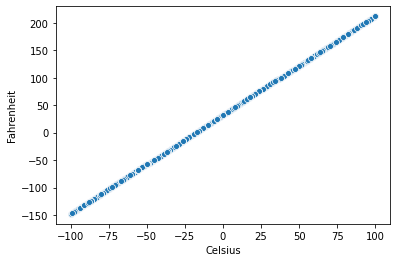

In [48]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

## STEP #3: Creating Training & Testing Dataset

In [49]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

## STEP #4: Build & Train the Model

In [50]:
X_train.shape

(1000,)

In [51]:
y_train.shape

(1000,)

In [61]:
# in tensorflow 2.0, keras API come automatically with tensorflow 2.0
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 32 , input_shape = (1,)))
#Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 32))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [79]:
epochs_hist = model.fit(X_train, y_train, epochs=50, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 0s 61us/sample - loss: 3.9718e-04 - val_loss: 2.0242e-04
Epoch 2/50
800/800 [==============================] - 0s 53us/sample - loss: 2.7293e-05 - val_loss: 5.6856e-07
Epoch 3/50
800/800 [==============================] - 0s 53us/sample - loss: 3.7603e-05 - val_loss: 2.2163e-04
Epoch 4/50
800/800 [==============================] - 0s 57us/sample - loss: 0.0392 - val_loss: 0.0267
Epoch 5/50
800/800 [==============================] - 0s 57us/sample - loss: 12.4306 - val_loss: 16.4543
Epoch 6/50
800/800 [==============================] - 0s 53us/sample - loss: 8.2178 - val_loss: 0.1486
Epoch 7/50
800/800 [==============================] - 0s 55us/sample - loss: 13.0357 - val_loss: 537.6204
Epoch 8/50
800/800 [==============================] - 0s 55us/sample - loss: 12467.4254 - val_loss: 11436.2709
Epoch 9/50
800/800 [==============================] - 0s 53us/sample - loss: 10816.5152 - val

## STEP #5: Evaluating the Model

In [80]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

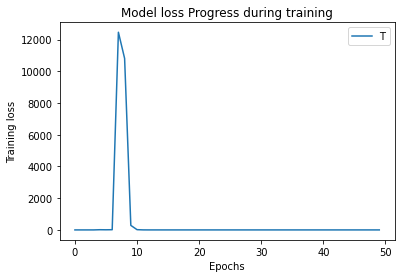

In [81]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

Text(0, 0.5, 'Training loss')

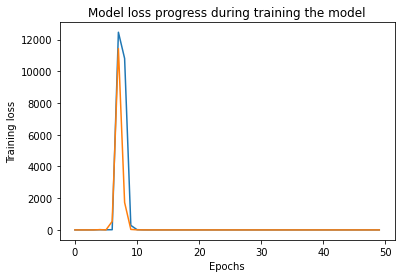

In [82]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')

In [83]:
model.get_weights()

[array([[ 1.2676884 , -0.8383538 ,  1.3006303 , -1.1937852 ,  1.1047567 ,
         -1.3703457 , -1.0745071 ,  1.2820911 , -1.3182733 ,  1.1083184 ,
          1.5080292 , -1.9162922 , -1.0656005 , -1.1578585 ,  1.21094   ,
         -1.4124494 ,  1.8963668 , -1.0498224 , -0.9980737 ,  1.3870387 ,
         -1.326021  , -1.3952136 , -1.2238437 , -1.1809022 , -1.3950156 ,
         -1.1008517 ,  0.45360547,  1.2061949 ,  1.8832971 , -1.2379857 ,
          1.2476867 , -1.3001263 ]], dtype=float32),
 array([-1.7525816,  4.682883 , -4.7762523,  2.7827032, -2.718477 ,
         3.8664908,  3.6683583, -2.003179 ,  4.3727574, -1.3513364,
        -3.2980733, -2.0896904,  2.921529 ,  4.8172717, -5.582831 ,
         3.063545 ,  2.0363667,  4.6115923,  3.9212615, -4.004783 ,
         1.3473316,  2.888407 ,  1.9054044,  5.2393193,  3.2991788,
         3.7530923, 16.672865 , -5.7987924,  1.9883554,  2.807545 ,
        -5.516213 ,  4.973724 ], dtype=float32),
 array([[ 0.769528  ,  3.2748203 , -2.3608692 

In [84]:
# Use the same model to perform predictions
Temp_C = 12
Temp_F = model.predict([Temp_C])
print('Temprature in Fahrenheit using simple ANN=', Temp_F)

Temprature in Fahrenheit using simple ANN= [[53.600002]]


In [85]:
# Lets confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temprature in Fahrenheit using normal equation=', Temp_F)

Temprature in Fahrenheit using normal equation= 53.6
